In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import random
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def get_card():
    x=random.randint(1,13)
    return min(x,10)

In [3]:
def check_usable_ace(card):
    s=sum(card)
    ace=False
    for index in card:
        if index==1:
            ace=True
    return ace and s<=11

In [4]:
def getsum(card):
    s=sum(card)
    for index in card:
        if(index==1):
            if s<=11:
                s+=10
    return s

In [5]:
v_mid=[[[list()for i in range(2)]for j in range(15)]for k in range(22)]
v_all=[[[list()for i in range(2)]for j in range(15)]for k in range(22)]
returns=[[[list()for i in range(2)]for j in range(15)]for k in range(22)]
# v:10*10*2,第一维为玩家的牌（12-21），第二维为庄家的牌，第三位为是否有可用的A

In [6]:
def episode(): #进行一幕
    dealer_card=[]
    player_card=[]
    player_state=[]
    reward=0
    dealer_card.append(get_card()) #假设这个牌为庄家的明牌
    dealer_card.append(get_card())
    player_card.append(get_card())
    player_card.append(get_card())
    
    player_now_state=[getsum(player_card),dealer_card[0],check_usable_ace(player_card)]
    if(getsum(player_card)>=12):
        player_state.append(tuple(player_now_state)) #加入初始状态
        
    while getsum(player_card)<20: #玩家要牌
        new_card=get_card()
        player_card.append(new_card)
        if(getsum(player_card)>21): #爆牌
            reward=-1
            break
        if(getsum(player_card)>=12):
            player_state.append(tuple([getsum(player_card),dealer_card[0],check_usable_ace(player_card)]))
                
    if reward==-1:
        #print("player",player_card,getsum(player_card),dealer_card,getsum(dealer_card))
        return reward,player_state
    
    else: #庄家要牌
        while getsum(dealer_card)<17:
            new_card=get_card()
            dealer_card.append(new_card)
            if(getsum(dealer_card)>21): #庄家爆牌
                reward=1
                break
            
    if reward==1:
        #print("dealer",getsum(player_card),dealer_card[0],check_usable_ace(player_card))
        return reward,player_state
    
    else:
        dealer_sum=getsum(dealer_card)
        player_sum=getsum(player_card)
        #print("ok",player_card,player_sum,dealer_card,dealer_sum)
        if(dealer_sum>player_sum):
            return -1,player_state
        elif(dealer_sum==player_sum):
            return 0, player_state
        elif(dealer_sum<player_sum):
            return 1, player_state

In [7]:
def calc_v(v):
    for i in range(12,22):
        for j in range(1,11):
            for k in range(2):
                if(len(returns[i][j][k])):
                    v[i][j][k]=(sum(returns[i][j][k])/len(returns[i][j][k]))

In [8]:
for episodes in range(1000000):
    reward,state=episode()
    sz=len(state)
    l=dict()
    appear=[]
    for index in state:
        if index in l:
            appear.append(False)
        else:
            appear.append(True)
        l[index]=True
    for i in range(sz-1,-1,-1):
        if appear[i]:
            returns[state[i][0]][state[i][1]][int(state[i][2])].append(reward)
    if((episodes+1)==10000):
        calc_v(v_mid)
    if((episodes+1)%10000==0):
        print("episode {} done!".format(episodes+1))
calc_v(v_all)

episode 10000 done!
episode 20000 done!
episode 30000 done!
episode 40000 done!
episode 50000 done!
episode 60000 done!
episode 70000 done!
episode 80000 done!
episode 90000 done!
episode 100000 done!
episode 110000 done!
episode 120000 done!
episode 130000 done!
episode 140000 done!
episode 150000 done!
episode 160000 done!
episode 170000 done!
episode 180000 done!
episode 190000 done!
episode 200000 done!
episode 210000 done!
episode 220000 done!
episode 230000 done!
episode 240000 done!
episode 250000 done!
episode 260000 done!
episode 270000 done!
episode 280000 done!
episode 290000 done!
episode 300000 done!
episode 310000 done!
episode 320000 done!
episode 330000 done!
episode 340000 done!
episode 350000 done!
episode 360000 done!
episode 370000 done!
episode 380000 done!
episode 390000 done!
episode 400000 done!
episode 410000 done!
episode 420000 done!
episode 430000 done!
episode 440000 done!
episode 450000 done!
episode 460000 done!
episode 470000 done!
episode 480000 done!
e

Text(0.5, 0.92, 'no usable ace, 10000 episodes')

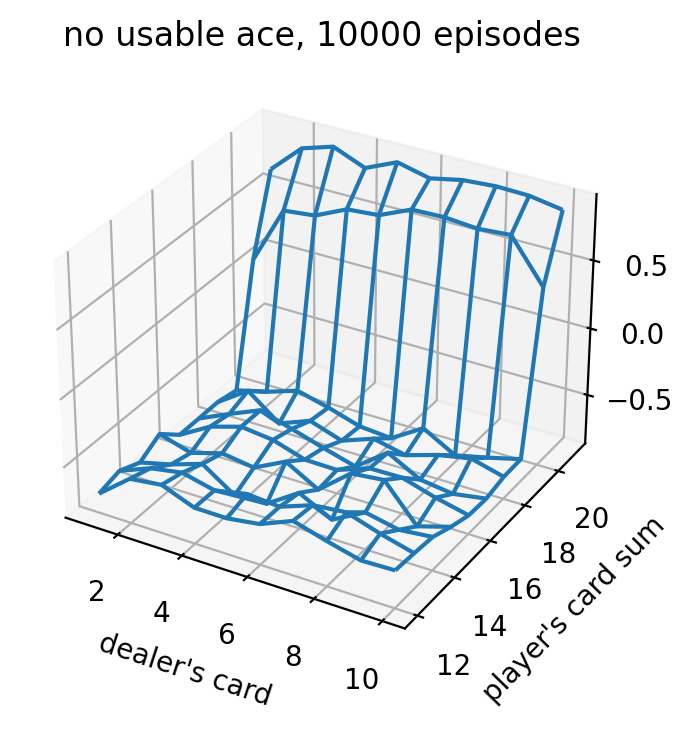

In [9]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
x=np.empty([10,10])
y=np.empty([10,10])
z=np.empty([10,10])
for i in range(12,22):
    for j in range(1,11):
        x[i-12][j-1]=i
        y[i-12][j-1]=j
        z[i-12][j-1]=v_mid[i][j][0]
# Plot a basic wireframe
ax.plot_wireframe(y, x, z, rstride=1, cstride=1)
plt.xlabel("dealer's card")
plt.ylabel("player's card sum")
plt.title("no usable ace, 10000 episodes")

Text(0.5, 0.92, 'usable ace, 10000 episodes')

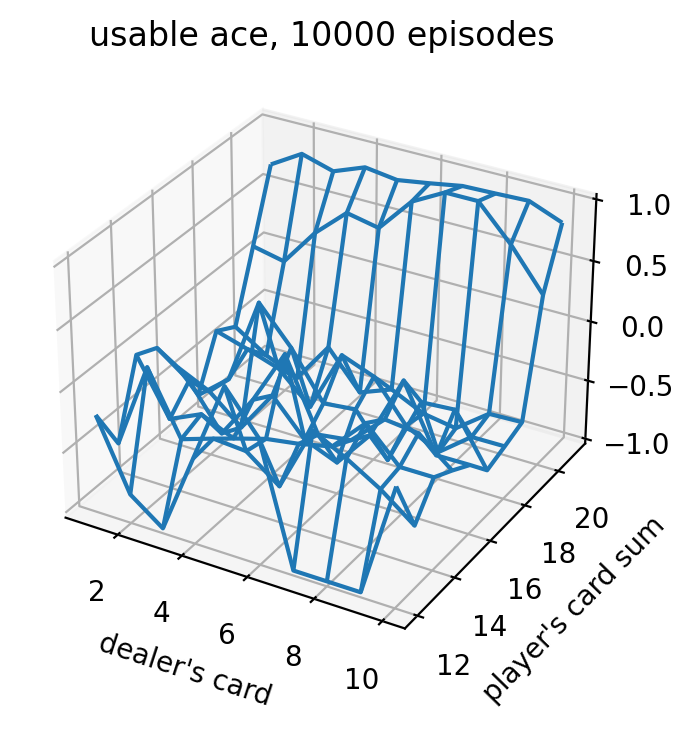

In [10]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
x=np.empty([10,10])
y=np.empty([10,10])
z=np.empty([10,10])
for i in range(12,22):
    for j in range(1,11):
        x[i-12][j-1]=i
        y[i-12][j-1]=j
        z[i-12][j-1]=v_mid[i][j][1]
# Plot a basic wireframe
ax.plot_wireframe(y, x, z, rstride=1, cstride=1)
plt.xlabel("dealer's card")
plt.ylabel("player's card sum")
plt.title("usable ace, 10000 episodes")


Text(0.5, 0.92, 'no usable ace, 1000000 episodes')

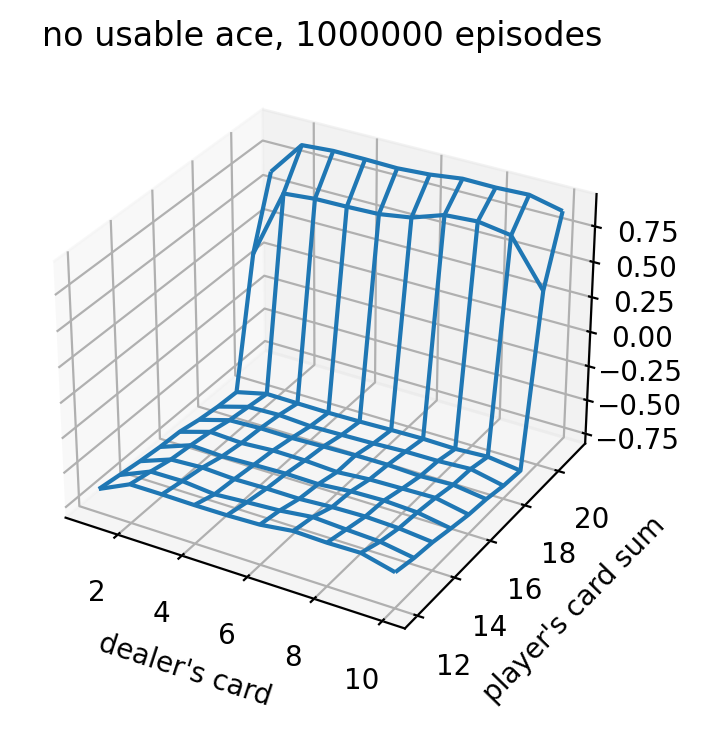

In [11]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
x=np.empty([10,10])
y=np.empty([10,10])
z=np.empty([10,10])
for i in range(12,22):
    for j in range(1,11):
        x[i-12][j-1]=i
        y[i-12][j-1]=j
        z[i-12][j-1]=v_all[i][j][0]
# Plot a basic wireframe
ax.plot_wireframe(y, x, z, rstride=1, cstride=1)
plt.xlabel("dealer's card")
plt.ylabel("player's card sum")
plt.title("no usable ace, 1000000 episodes")

Text(0.5, 0.92, 'usable ace, 1000000 episodes')

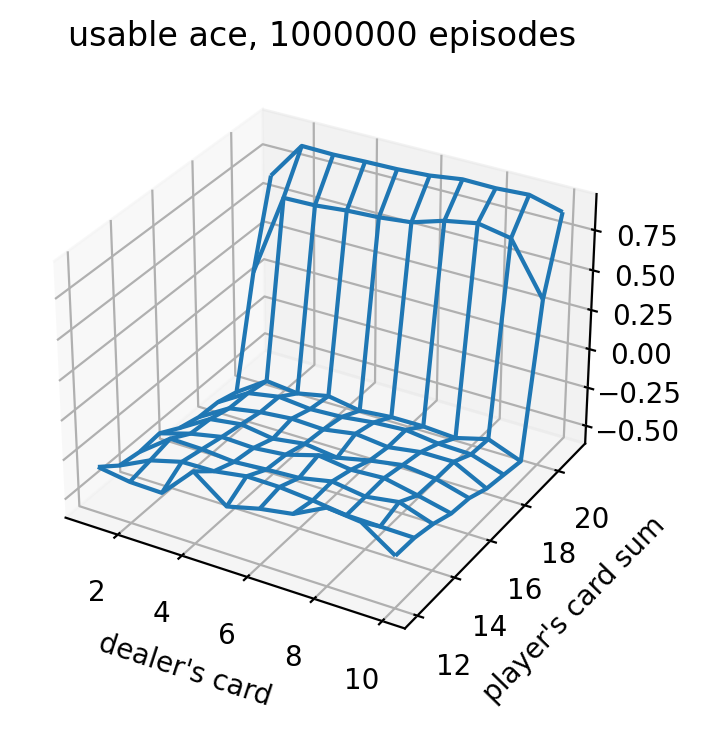

In [12]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
x=np.empty([10,10])
y=np.empty([10,10])
z=np.empty([10,10])
for i in range(12,22):
    for j in range(1,11):
        x[i-12][j-1]=i
        y[i-12][j-1]=j
        z[i-12][j-1]=v_all[i][j][1]
# Plot a basic wireframe
ax.plot_wireframe(y, x, z, rstride=1, cstride=1)
plt.xlabel("dealer's card")
plt.ylabel("player's card sum")
plt.title("usable ace, 1000000 episodes")